# PCHN63101 Regression Workshop
In the accompanying lesson to this workshop we explored ...

## Minimising Error With a Line

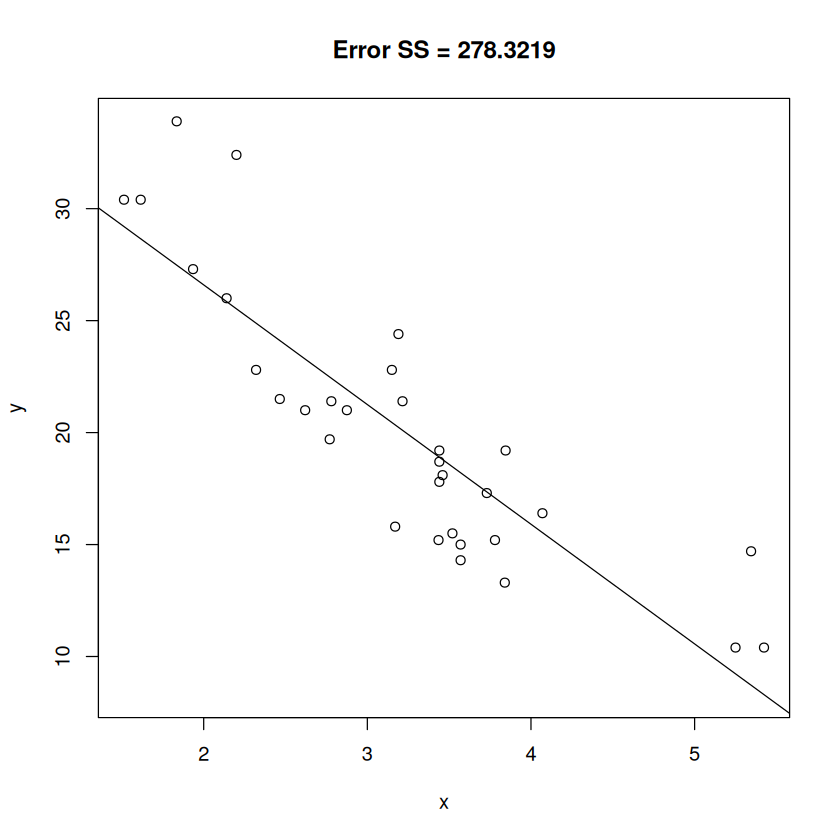

In [1]:
data(mtcars)
y <- mtcars$mpg
x <- mtcars$wt
m <- -5.3445 # OLS m = -5.3445
b <- 37.2851 # OLS b = 37.2851

# error sum-of-squares
error.SS  <- sum((y - (m*x + b))^2)

# figure out y-limits based on the range of estimated values and the data
est.lims  <- c(m*min(x)+b,m*max(x)+b)
est.range <- c(min(est.lims),max(est.lims))
plot.lim  <- c(min(min(y),est.range[1]), 
               max(max(y),est.range[2]))

plot(x, y, main=paste0("Error SS = ",round(error.SS,4)), ylim=plot.lim)
abline(coef=c(b,m))

<div class="alert alert-block alert-info"> 
<b>ACTIVITY</b> Try changing the values of <code>m</code> and <code>b</code> in the code above. Can you make the error sum-of-squares smaller than the OLS estimates?
</div>

## Regression as a Mean and Variance Function

In [2]:
data(mtcars)
mod <- lm(mpg ~ wt, data=mtcars)

We can see that the fitted/predicted values from the regression are *exactly* the results given by the mean function for the different measured values of `wt`. 

We can also simulate some data based on this model and see whether it looks similar to the data we have measured. This simulated data will capture the general *pattern* in the data as well as the *spread* around the regression line. In the example below, we use a range of $x$-values from 1 to 6 (using the `seq()` function). We then replicate this range 3 times, so that we simulate 3 value of $y$ for each value of $x$. We then simulate each $y$-value using the mean and variance functions. The result of the simulation is plotted below.

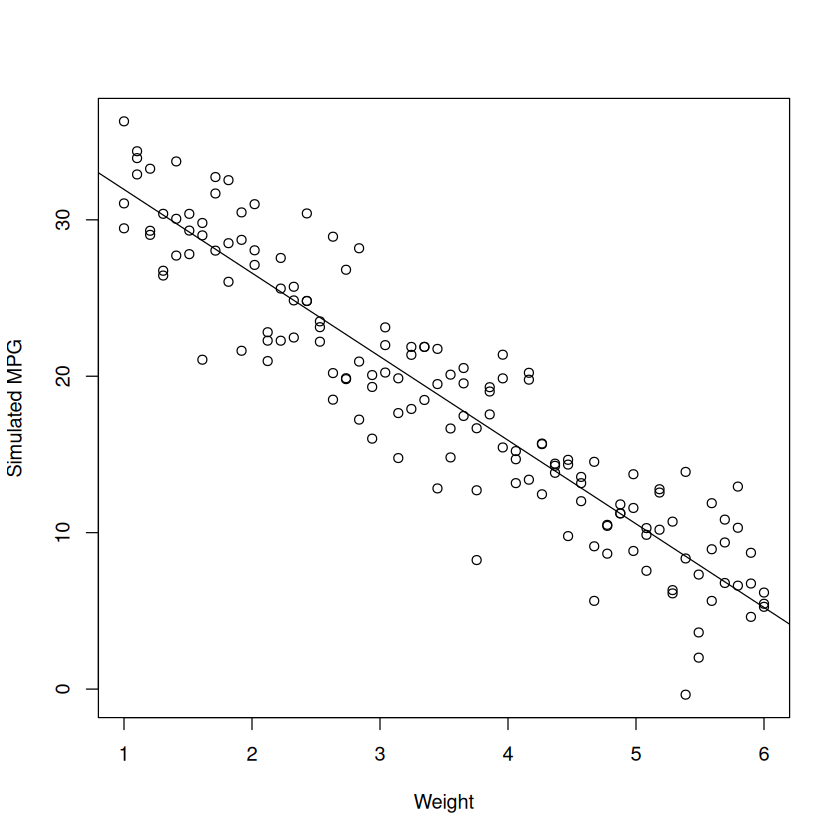

In [30]:
mean.func <- function(i,x){
    beta.0 <- coef(mod)[1]
    beta.1 <- coef(mod)[2]
    mu.i   <- beta.0 + beta.1*x[i]
    return(mu.i)
}

var.func <- function(i,x){
    sigma2 <- summary(mod)$sigma^2
    return(sigma2)
}

# control the number of simulated values
n.x    <- 50
n.reps <- 3

x     <- seq(from=1, to=6, length.out=n.x)
x     <- rep(x,n.reps)
nsubs <- length(x)
y.sim <- rep(0,nsubs)

for (i in 1:nsubs){
    y.sim[i] <- rnorm(n=1, mean=mean.func(i,x), sd=sqrt(var.func(i,x)))
}

plot(x, y.sim, xlab="Weight", ylab="Simulated MPG")
abline(reg=mod)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY</b> Have a play around with the values of <code>n.x</code> and <code>n.reps</code> in the code above. These control how many values of <code>wt</code> are included in the simulations, as well as how many cars at each value of <code>wt</code> we measure.
</div>

Notice that this simulation does *not* reflect the fact that, in the real data, at both lower and higher values of `wt`, the measures of `mpg` lie *above* the regression line. So while this simulation matches some elements of the data, it does not match all of them. Indeed, as we will see in future weeks, a *curved* line may be a better fit here than a *straight* line. We can see this as the curved yellow line in the plot below. We will discuss this type of visualisation in more detail a little later on the unit. For now, just try and make sure it is clear that the simulated data is based on the straight-line fit, yet this will not accurately reflect any *non-linearities* in the real data. The simulation is what our model says the data-generating process is, but we need to be sure that this agrees with what we can *actually* see.

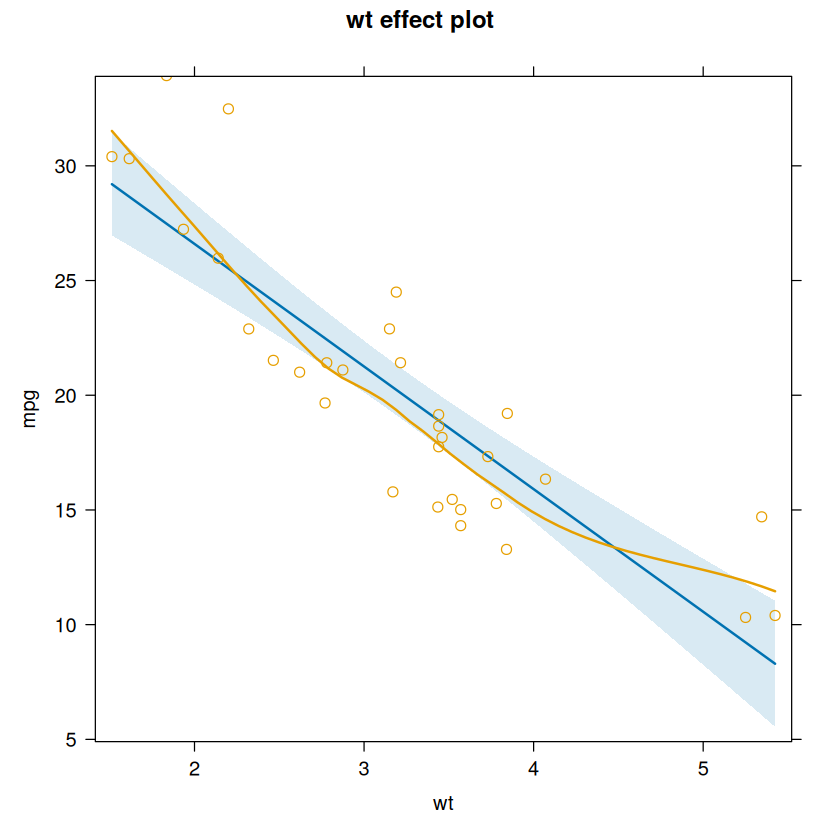

In [33]:
library(effects)
plot(allEffects(mod, residuals=TRUE))